> [!Warning] 
> **This project is still in an early phase of development.**
>
> The [python API](https://c-star.readthedocs.io/en/latest/api.html) is not yet stable, and some aspects of the schema for the [blueprint](https://c-star.readthedocs.io/en/latest/terminology.html#term-blueprint) will likely evolve. 
> Therefore whilst you are welcome to try out using the package, we cannot yet guarantee backwards compatibility. 
We expect to reach a more stable version in Q1 2025.
>
> To see which systems C-Star has been tested on so far, see [Supported Systems](https://c-star.readthedocs.io/en/latest/machines.html).

> [!Warning]
> 
> This notebook assumes you are running the NERSC Perlmutter HPC machine.
> You will need to change some arguments in order to run this notebook verbatim on any other machine.

# Restarting & continuing a `Case`
In this guide we will:

- Take the Case we ran for two days (2012-01-01 to 2012-01-03) on the [previous page](https://c-star.readthedocs.io/en/latest/2_importing_and_running_a_case_from_a_blueprint.html) and create a new Case that picks up where it ends (`Case.restart()`)
- Run this second case with a larger time step for the remainder of the month of January 2012
- Produce a basic plot of the output


## Restarting our Case
On the [previous page](https://c-star.readthedocs.io/en/latest/2_importing_and_running_a_case_from_a_blueprint.html), we began this run from a set of prescribed initial conditions and ran it for two days with a short time step of 60 seconds. We should now be able to restart the model with a slightly larger time step.
To do this, we can use the `Case.restart()` method, which returns a new `Case` whose start date corresponds to the end date of the Case we began with, and whose initial conditions are replaced with a restart file from our previous run.

<div class="alert alert-info">

Note

If you are following this interactively, the following cells should be appended to the [previous notebook](https://c-star.readthedocs.io/en/latest/2_importing_and_running_a_case_from_a_blueprint.html) where `example_case_1` is still in the workspace.
</div>



In [19]:
example_case_2 = example_case_1.restart(new_end_date="2012-01-31 12:00:00")

Taking a look at the ROMS component, We can see that the initial conditions have been changed:

In [20]:
example_case_2.components[1].initial_conditions

ROMSInitialConditions(
location = '/global/cfs/cdirs/m4746/Users/dafydd/my_c_star/examples/alpha_example/example_case/output/ROMS_MARBL_rst.20120103120000.nc',
file_hash = None
)

## Increasing the time step

If we want to increase the time step for our second run, we will have to manually change the `time_step` entry under `ROMSComponent.discretization`:

In [21]:
example_case_2.components[1]

ROMSComponent(
base_model = <ROMSBaseModel instance>, 
additional_source_code = <AdditionalCode instance>, 

namelists = <AdditionalCode instance>, 
discretization = ROMSDiscretization(time_step = 60, n_procs_x = 3, n_procs_y = 3)
model_grid = <ROMSModelGrid instance>
initial_conditions = <ROMSInitialConditions instance>
tidal_forcing = <ROMSTidalForcing instance>
surface_forcing = <list of 2 ROMSSurfaceForcing instances>
boundary_forcing = <list of 2 ROMSBoundaryForcing instances>
)

In [22]:
example_case_2.components[1].discretization.time_step = 360

We can now take a look at our `Case` and see everything is as expected:

In [23]:
example_case_2

Case(
name = roms_tools_example, 
caseroot = /global/cfs/cdirs/m4746/Users/dafydd/my_c_star/examples/alpha_example/example_case, 
start_date = 2012-01-03 12:00:00, 
end_date = 2012-01-31 12:00:00, 
valid_start_date = 2012-01-01 12:00:00, 
valid_end_date = 2012-12-31 23:00:00, 
components = [
MARBLComponent(
base_model = <MARBLBaseModel instance>, 
), 
ROMSComponent(
base_model = <ROMSBaseModel instance>, 
additional_source_code = <AdditionalCode instance>, 

namelists = <AdditionalCode instance>, 
discretization = ROMSDiscretization(time_step = 360, n_procs_x = 3, n_procs_y = 3)
model_grid = <ROMSModelGrid instance>
initial_conditions = <ROMSInitialConditions instance>
tidal_forcing = <ROMSTidalForcing instance>
surface_forcing = <list of 2 ROMSSurfaceForcing instances>
boundary_forcing = <list of 2 ROMSBoundaryForcing instances>
)
])

Now we run through the other steps as normal:

In [24]:
example_case_2.setup()
example_case_2.build()
example_case_2.pre_run()


Setting up MARBLComponent
--------------------------
Configuring MARBLComponent
--------------------------
MARBLBaseModel correctly configured. Nothing to be done

Setting up ROMSComponent
-------------------------
Configuring ROMSComponent
-------------------------
ROMSBaseModel correctly configured. Nothing to be done

Fetching additional source code...
----------------------------------
Cloned repository https://github.com/CWorthy-ocean/cstar_blueprint_roms_marbl_example.git to /tmp/tmp3hsmz1p4
Checked out cstar_alpha in git repository /tmp/tmp3hsmz1p4
copying bgc.opt to /global/cfs/cdirs/m4746/Users/dafydd/my_c_star/examples/alpha_example/example_case/additional_source_code/ROMS
copying bulk_frc.opt to /global/cfs/cdirs/m4746/Users/dafydd/my_c_star/examples/alpha_example/example_case/additional_source_code/ROMS
copying cppdefs.opt to /global/cfs/cdirs/m4746/Users/dafydd/my_c_star/examples/alpha_example/example_case/additional_source_code/ROMS
copying diagnostics.opt to /global/cfs

In [28]:
example_case_2.run(account_key="m4746", walltime="00:30:00", queue="shared")


Running ROMS: 
------------
Submitted batch job 32845599


In [29]:
%%bash
squeue -u $USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          32845599 shared_mi my_case_   dafydd PD       0:00      1 (Resources)
          32837413 urgent_mi  jupyter   dafydd  R    3:36:34      1 nid004290


Once again, we have to wait for the job to finish before proceeding...

In [30]:
example_case_2.post_run()


Completing post-processing steps for ROMSComponent
---------------------------------------------------
Joining netCDF files ROMS_MARBL_his.20120116120000.*.nc...
Joining netCDF files ROMS_MARBL_his.20120128120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120105120000.*.nc...
Joining netCDF files ROMS_MARBL_his.20120115120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120111120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120129120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120106120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120127120000.*.nc...
Joining netCDF files ROMS_MARBL_his.20120122120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120104120000.*.nc...
Joining netCDF files ROMS_MARBL_his.20120113120000.*.nc...
Joining netCDF files ROMS_MARBL_his.20120109120000.*.nc...
Joining netCDF files ROMS_MARBL_rst.20120116120000.*.nc...
Joining netCDF files ROMS_MARBL_his.20120130120000.*.nc...
Joining netCDF files ROMS_MARBL_his.20120123120000.*.nc...
Joining net

## Some basic analysis of the output
Now we've finished running the model, we have a month of output to take a look at. 

C-Star doesn't currently support plots of model data, so we will have to manually produce plots from the model files. Don't worry too much about understanding the model's naming conventions in this code cell (C-Star will usually take care of these things for you) - this is just a visual demonstration!

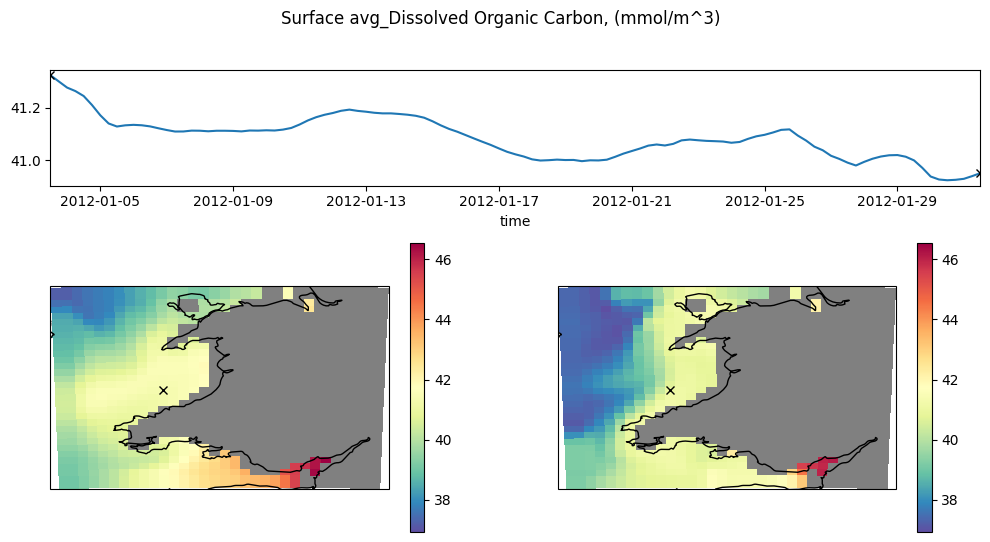

In [31]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import datetime as dt
import cartopy.feature as cfeature

bgc_ds = xr.open_dataset(example_case_2.caseroot / 'output/ROMS_MARBL_bgc.20120103120000.nc') # this contains 6-hourly data, with the date in the filename reflecting the first time entry
grd_ds = xr.open_dataset(example_case_2.caseroot / 'input_datasets/ROMS/roms_grd.nc')
lon,lat=grd_ds.lon_rho,grd_ds.lat_rho
output_time=[dt.datetime(2000,1,1)+dt.timedelta(seconds=t) for t in bgc_ds.ocean_time.values]

var = 'DOC'
i_idx = 10
j_idx = 15 
k_idx = 19
t_idx = [0,-1]

plot_data = bgc_ds[var].where(grd_ds.mask_rho).isel(s_rho=k_idx)

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


fig = plt.figure()
cmap=plt.get_cmap('Spectral_r')
cmap.set_bad('grey')

gs = GridSpec(3, 2, figure=fig, hspace=0.5)

# time series
ax1 = fig.add_subplot(gs[0, :])

ax1.plot(output_time,plot_data[:,j_idx,i_idx])
ax1.set_xlim(output_time[0],output_time[-1])
ax1.set_xlabel('time')
ax1.plot(output_time[t_idx[0]],plot_data[t_idx[0],j_idx,i_idx],'kx')
ax1.plot(output_time[t_idx[-1]],plot_data[t_idx[-1],j_idx,i_idx],'kx')


# Maps
ax2 = fig.add_subplot(gs[1:, 0],projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[1:, 1],projection=ccrs.PlateCarree())

VMIN = np.min(plot_data.values[plot_data.values > 0])
VMAX = np.max(plot_data.values[plot_data.values > 0])

p2 = ax2.pcolormesh(lon,lat,plot_data.isel(time=0).values, vmin=VMIN, vmax=VMAX, cmap=cmap)
p3 = ax3.pcolormesh(lon,lat,plot_data.isel(time=-1).values, vmin=VMIN, vmax=VMAX, cmap=cmap)
[a.set_xticks([]) for a in [ax2, ax3]]
[a.set_yticks([]) for a in [ax2, ax3]]

ax2.set_title("")
ax2.plot(lon[j_idx,i_idx].values-360, lat[j_idx,i_idx].values, 'kx')
ax3.plot(lon[j_idx,i_idx].values-360, lat[j_idx,i_idx].values, 'kx')

[a.add_feature(cfeature.COASTLINE, linewidth=1) for a in [ax3,ax2]]
fig.colorbar(p2, ax=ax2)
fig.colorbar(p3, ax=ax3)

fig.suptitle(f'Surface {bgc_ds[var].long_name}, ({bgc_ds[var].units})')
fig.set_size_inches(12,6)
grd_ds.close()